In [ ]:
#TCIA Lables

Found 200 label files. Displaying 20 cases.


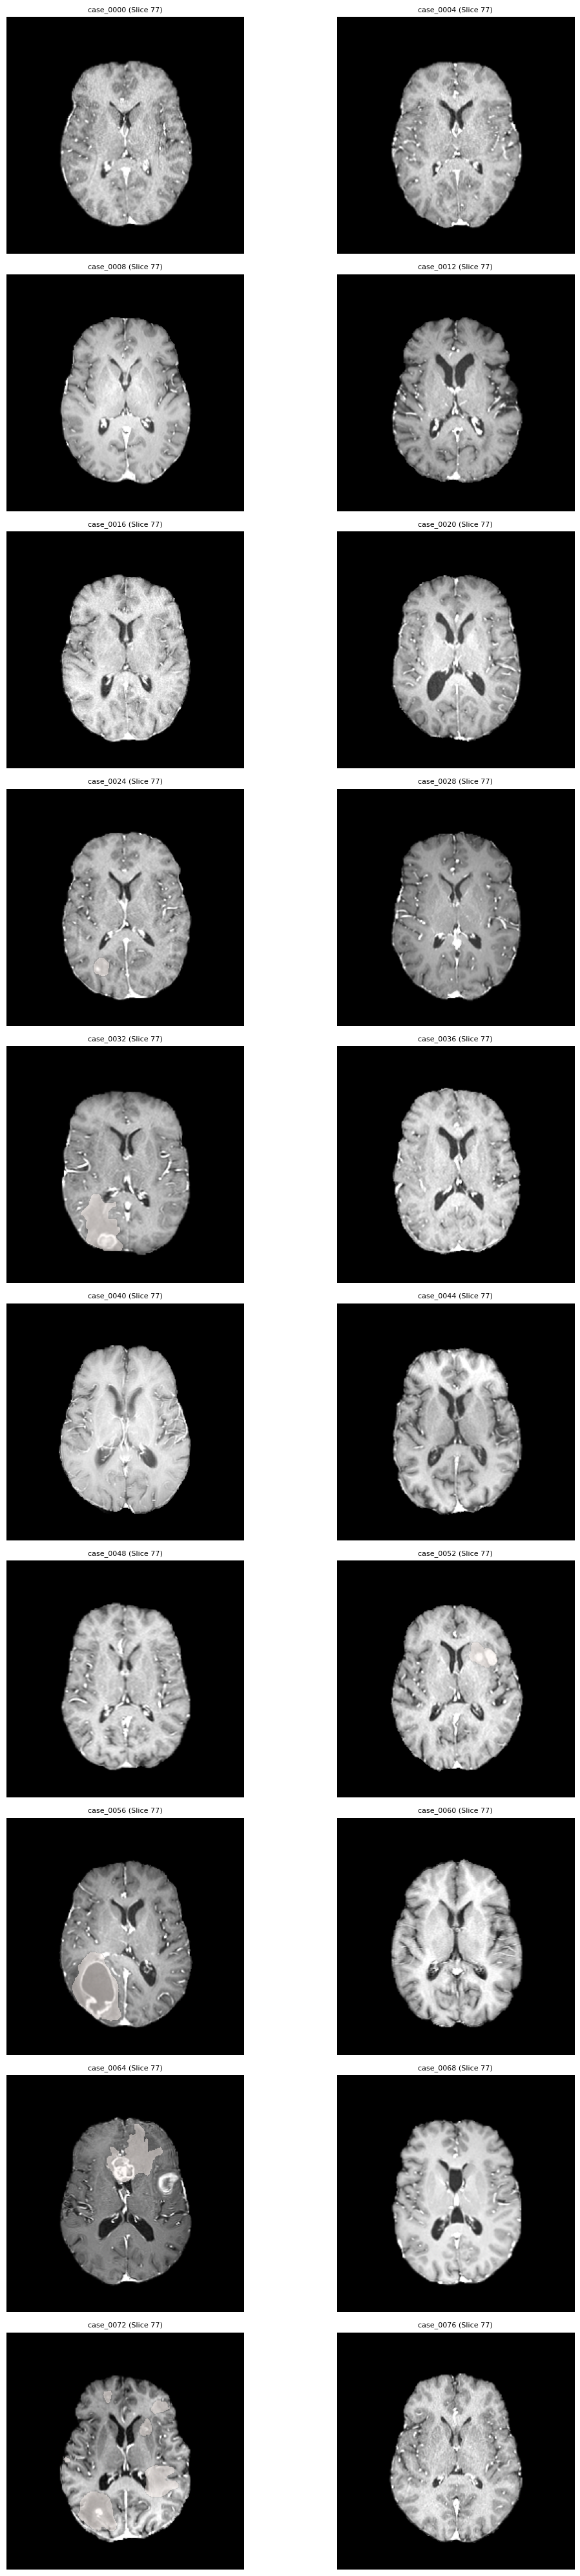

In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import os
import numpy as np
from glob import glob

# --- CONFIGURATION ---
LABELS_DIR = r"F:\nnUNet_raw\Dataset001_BrainMets\labelsTr"
# Assume the raw images are in the sibling directory 'imagesTr'
RAW_IMAGE_DIR = os.path.join(os.path.dirname(LABELS_DIR), "imagesTr")
NUM_CASES_TO_DISPLAY = 20

# --- Get the list of ground truth segmentation files ---
# We use glob to find all files ending in .nii.gz in the labels folder
label_files = sorted(glob(os.path.join(LABELS_DIR, "*.nii.gz")))

if not label_files:
    print(f"ERROR: No NIfTI label files found in {LABELS_DIR}")
else:
    print(f"Found {len(label_files)} label files. Displaying {min(len(label_files), NUM_CASES_TO_DISPLAY)} cases.")

# --- Start Visualization Loop ---
cases_displayed = 0
# Create a figure with two columns (Image and Mask Overlay)
fig, axes = plt.subplots(NUM_CASES_TO_DISPLAY // 2, 2, figsize=(12, 4 * (NUM_CASES_TO_DISPLAY // 2)))
axes = axes.flatten()

for i, label_path in enumerate(label_files):
    if cases_displayed >= NUM_CASES_TO_DISPLAY:
        break
        
    # 1. Determine the case ID and find the raw image
    # Extracts 'case_XXXX' from the label filename (e.g., 'case_1001')
    case_id = os.path.basename(label_path).replace('.nii.gz', '').replace('.nii', '')
    
    # nnU-Net raw images have the '_0000' suffix
    raw_path = os.path.join(RAW_IMAGE_DIR, f"{case_id}_0000.nii.gz")
    
    if not os.path.exists(raw_path):
        print(f"WARNING: Raw image not found for {case_id} at {raw_path}. Skipping.")
        continue

    try:
        # 2. Load the image and mask data
        img_nii = nib.load(raw_path)
        label_nii = nib.load(label_path)
        
        img_data = img_nii.get_fdata()
        label_data = label_nii.get_fdata()
        
        # 3. Select a central slice for visualization (e.g., middle of the Z-axis)
        z_slice = img_data.shape[2] // 2
        
        img_slice = img_data[:, :, z_slice]
        label_slice = label_data[:, :, z_slice]
        
        # 4. Normalize image data for better contrast
        # Clip intensity values for better visibility (common for MR/CT)
        vmax = np.percentile(img_slice, 99.5)
        vmin = np.percentile(img_slice, 0.5)

        # 5. Plotting (Image + Mask Overlay)
        ax = axes[cases_displayed]
        
        # Display the base image
        ax.imshow(img_slice.T, cmap="gray", origin="lower", vmin=vmin, vmax=vmax)
        
        # Overlay the segmentation mask
        # We use a custom color map where 0 (background) is transparent
        mask = np.ma.masked_where(label_slice.T == 0, label_slice.T)
        
        # 'Reds' for color, semi-transparent (alpha=0.5)
        ax.imshow(mask, cmap='Reds', alpha=0.5, origin="lower") 
        
        ax.set_title(f"{case_id} (Slice {z_slice})", fontsize=8)
        ax.axis('off')
        
        cases_displayed += 1

    except Exception as e:
        print(f"Error processing {case_id}: {e}")
        continue

# Clean up any unused subplots if fewer than 20 cases were displayed
for j in range(cases_displayed, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
#pseudo labels

Found 3773 total label files. Displaying 20 random cases.
Error processing pseudo_case_3320: File E:/nnUNet_raw/Dataset002_BrainMets_Semi/imagesTr/pseudo_case_3320_0000.nii.gz is not a gzip file


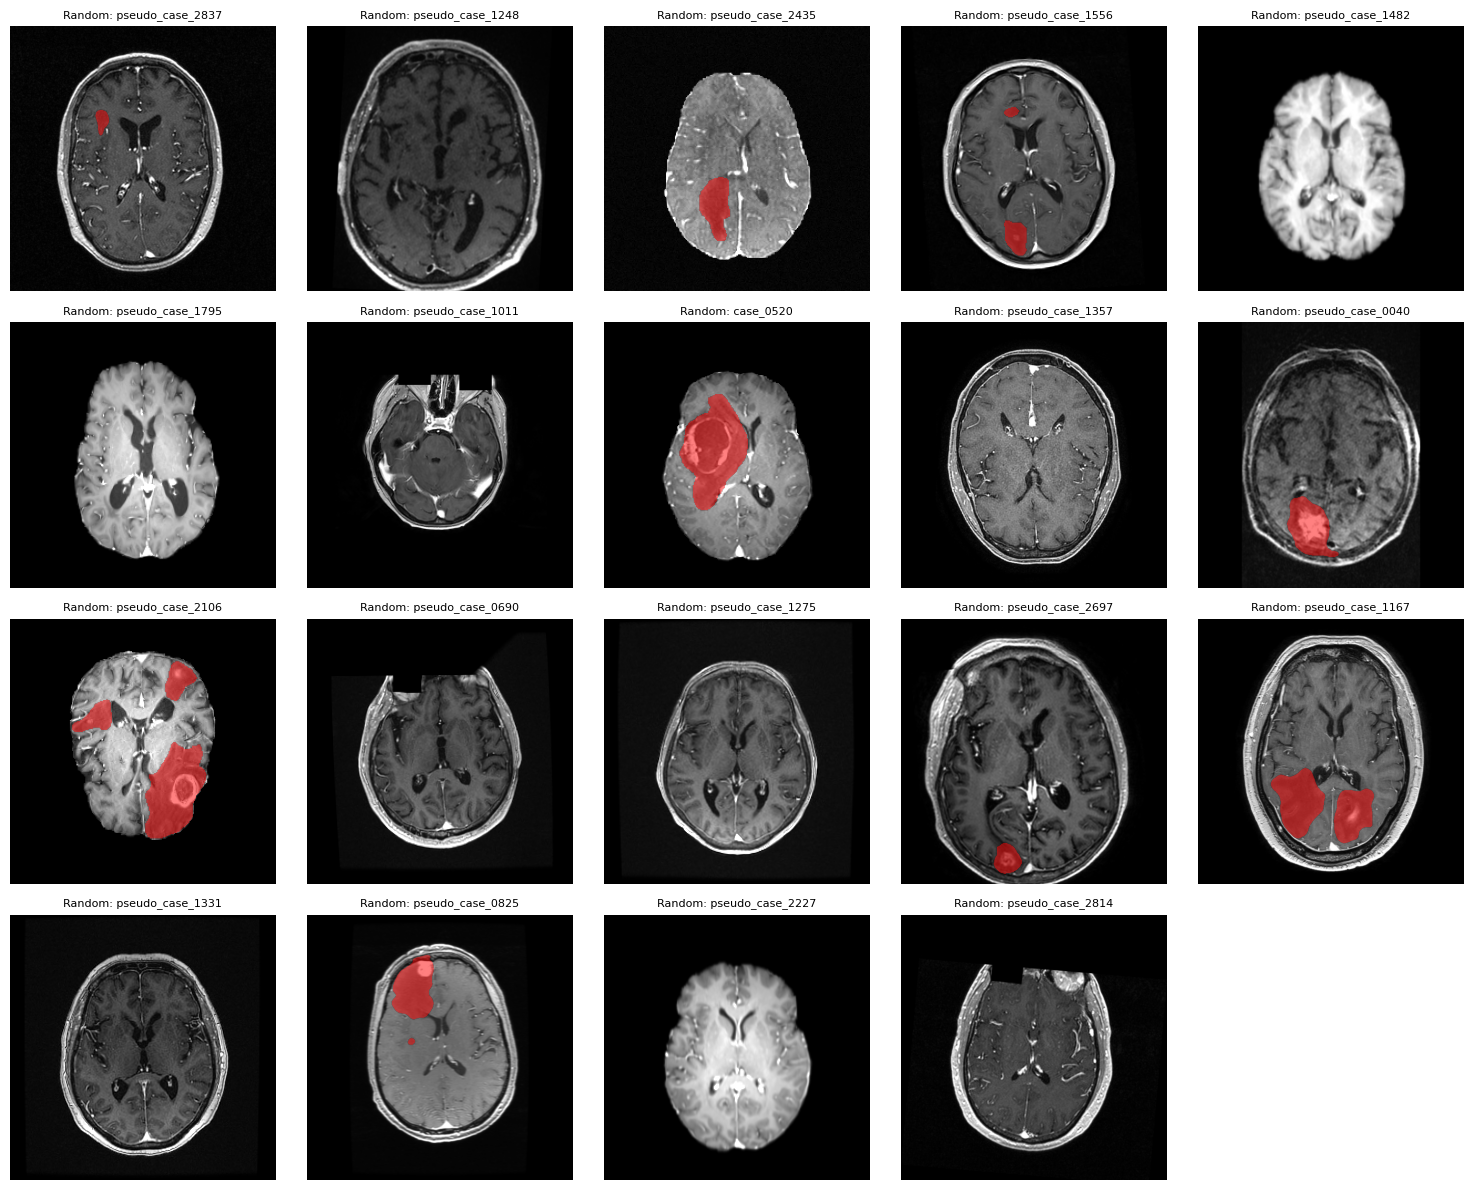

In [7]:
import nibabel as nib
import matplotlib.pyplot as plt
import os
import numpy as np
import random
from glob import glob

# --- CONFIGURATION ---
LABELS_DIR = r"E:\nnUNet_raw\Dataset002_BrainMets_Semi\labelsTr"
# Assume the raw images are in the sibling directory 'imagesTr'
RAW_IMAGE_DIR = os.path.join(os.path.dirname(LABELS_DIR), "imagesTr")
NUM_CASES_TO_DISPLAY = 20

# --- 1. Get the list of all ground truth segmentation files ---
label_files = sorted(glob(os.path.join(LABELS_DIR, "*.nii.gz")))

if not label_files:
    print(f"ERROR: No NIfTI label files found in {LABELS_DIR}")
    # You might need to check file extension or path if this fails.
    exit()

# 2. Select a random sample of files
if len(label_files) > NUM_CASES_TO_DISPLAY:
    random_sample_files = random.sample(label_files, NUM_CASES_TO_DISPLAY)
else:
    random_sample_files = label_files
    
print(f"Found {len(label_files)} total label files. Displaying {len(random_sample_files)} random cases.")

# --- 3. Start Visualization Loop ---
cases_displayed = 0
# Create a figure for the plots (e.g., 4 rows x 5 columns = 20 plots)
# Adjust layout based on the number of cases being displayed
cols = 5
rows = (len(random_sample_files) + cols - 1) // cols 
fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))

# Ensure axes is iterable even if only one row/column
axes = axes.flatten() if isinstance(axes, (np.ndarray, list)) else [axes]

for i, label_path in enumerate(random_sample_files):
    
    # 4. Determine the case ID and find the raw image
    case_id = os.path.basename(label_path).replace('.nii.gz', '').replace('.nii', '')
    raw_path = os.path.join(RAW_IMAGE_DIR, f"{case_id}_0000.nii.gz")
    
    if not os.path.exists(raw_path):
        print(f"WARNING: Raw image not found for {case_id} at {raw_path}. Skipping.")
        continue

    try:
        # 5. Load the image and mask data
        img_nii = nib.load(raw_path)
        label_nii = nib.load(label_path)
        
        img_data = img_nii.get_fdata()
        label_data = label_nii.get_fdata()
        
        # 6. Select a slice (middle of the Z-axis)
        z_slice = img_data.shape[2] // 2
        img_slice = img_data[:, :, z_slice]
        label_slice = label_data[:, :, z_slice]
        
        # 7. Normalize image contrast
        vmax = np.percentile(img_slice, 99.5)
        vmin = np.percentile(img_slice, 0.5)

        # 8. Plotting (Image + Mask Overlay)
        ax = axes[cases_displayed]
        
        # Display the base image
        ax.imshow(img_slice.T, cmap="gray", origin="lower", vmin=vmin, vmax=vmax)
        
        # Overlay the segmentation mask (mask out the background value of 0)
        mask = np.ma.masked_where(label_slice.T == 0, label_slice.T)
        
        # Use a bright, contrasting color for the mask
        ax.imshow(mask, cmap='hsv', alpha=0.5, origin="lower") 
        
        ax.set_title(f"Random: {case_id}", fontsize=8)
        ax.axis('off')
        
        cases_displayed += 1

    except Exception as e:
        print(f"Error processing {case_id}: {e}")
        continue

# Clean up any unused subplots
for j in range(cases_displayed, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
#Kaggle labels(Testing)

Found 624 predicted cases. Displaying 20.


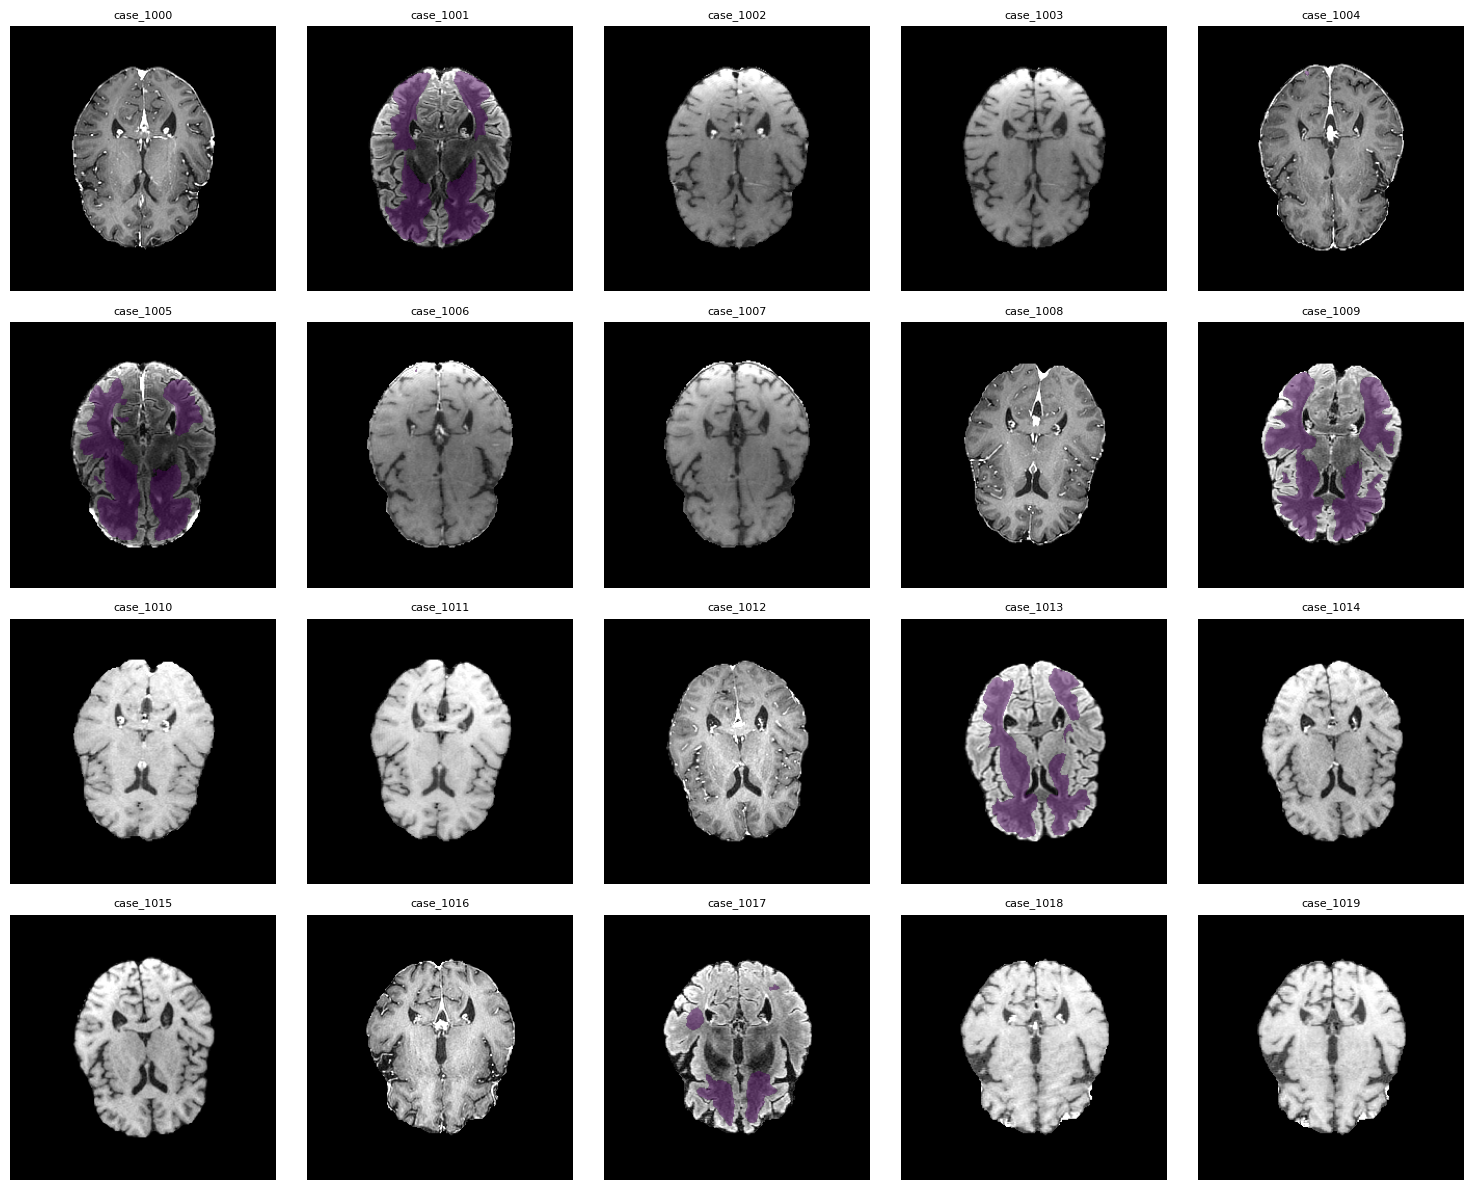

In [8]:
import nibabel as nib
import matplotlib.pyplot as plt
import os
import numpy as np
from glob import glob

# --- CONFIGURATION ---
PREDICTION_DIR = r"E:\nnUNet_predictions\Kaggle_Submission_D002_Fold2"
RAW_IMAGE_DIR = r"E:\nnUNet_raw\Dataset002_BrainMets_Semi\imagesTs"
NUM_CASES_TO_DISPLAY = 20

# --- Get the list of predicted segmentation files ---
# We use glob to find all files ending in .nii.gz in the prediction folder
predicted_files = sorted(glob(os.path.join(PREDICTION_DIR, "*.nii.gz")))

if not predicted_files:
    print(f"ERROR: No NIfTI files found in {PREDICTION_DIR}")
    # You might need to change the file extension if they are .nii instead of .nii.gz
    # Example: predicted_files = sorted(glob(os.path.join(PREDICTION_DIR, "*.nii")))
else:
    print(f"Found {len(predicted_files)} predicted cases. Displaying {min(len(predicted_files), NUM_CASES_TO_DISPLAY)}.")

# --- Start Visualization Loop ---
cases_displayed = 0
fig, axes = plt.subplots(4, 5, figsize=(15, 12)) # 4 rows, 5 columns = 20 plots
axes = axes.flatten()

for i, pred_path in enumerate(predicted_files):
    if cases_displayed >= NUM_CASES_TO_DISPLAY:
        break
        
    # 1. Determine the case ID and find the raw image
    # Extracts 'case_XXXX' from the prediction filename
    case_id = os.path.basename(pred_path).replace('.nii.gz', '').replace('.nii', '')
    
    # nnU-Net raw images have the '_0000' suffix
    raw_path = os.path.join(RAW_IMAGE_DIR, f"{case_id}_0000.nii.gz")
    
    if not os.path.exists(raw_path):
        print(f"WARNING: Raw image not found for {case_id} at {raw_path}. Skipping.")
        continue

    try:
        # 2. Load the image and prediction data
        img_nii = nib.load(raw_path)
        seg_nii = nib.load(pred_path)
        
        img_data = img_nii.get_fdata()
        seg_data = seg_nii.get_fdata()
        
        # 3. Select a central slice for visualization (e.g., middle of the Z-axis)
        z_slice = img_data.shape[2] // 2
        
        img_slice = img_data[:, :, z_slice]
        seg_slice = seg_data[:, :, z_slice]
        
        # 4. Normalize image data for better contrast
        # Clip to common intensity window (optional but often useful for MR/CT)
        vmax = np.percentile(img_slice, 99.5)
        vmin = np.percentile(img_slice, 0.5)

        # 5. Plotting
        ax = axes[cases_displayed]
        
        # Display the base image
        ax.imshow(img_slice.T, cmap="gray", origin="lower", vmin=vmin, vmax=vmax)
        
        # Overlay the segmentation mask
        # We use a custom color map where 0 (background) is transparent
        mask = np.ma.masked_where(seg_slice.T == 0, seg_slice.T)
        ax.imshow(mask, cmap='viridis', alpha=0.5, origin="lower") # 'viridis' or 'Reds' for color
        
        ax.set_title(case_id, fontsize=8)
        ax.axis('off')
        
        cases_displayed += 1

    except Exception as e:
        print(f"Error processing {case_id}: {e}")
        continue

# Clean up any unused subplots if fewer than 20 cases were displayed
for j in range(cases_displayed, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()